<a href="https://colab.research.google.com/github/swaroopkasaraneni/AI/blob/main/TextClassification2Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 “Eopinions.csv” dataset has 2 columns: ‘class’ and ‘text’
 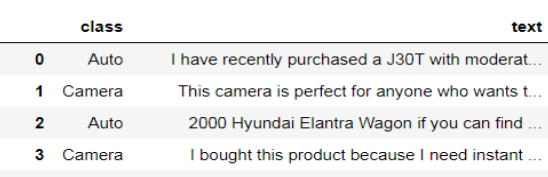

1. Read the file as a pandas data-frame.
2. Perform Label Encoding on ‘class’ column.
3. Plot a bar graph to compare the frequenciesof both the classes.



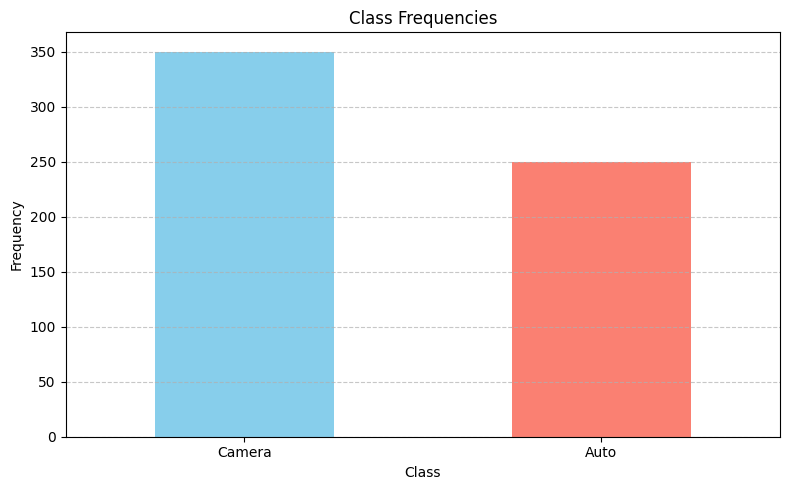

Label Encoding Mapping:
'Auto' -> 0
'Camera' -> 1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

try:

    df = pd.read_csv("Eopinions.csv")

    if 'class' not in df.columns:
        print("The CSV file must contain a 'class' column.")
    else:

      label_encoder = LabelEncoder()
      df['Encoded Class'] = label_encoder.fit_transform(df['class'])

      # Get class frequencies
      class_counts = df['class'].value_counts()

      # Plot a bar graph of class frequencies
      plt.figure(figsize=(8, 5))
      class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
      plt.title('Class Frequencies')
      plt.xlabel('Class')
      plt.ylabel('Frequency')
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.tight_layout()

      # Show the plot
      plt.show()

      # Display encoded classes
      print("Label Encoding Mapping:")
      for original_class, encoded_class in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
          print(f"'{original_class}' -> {encoded_class}")

except Exception as e:
    print(f"An error occurred: {e}")


4. Preprocess the ‘text’ column
5. Vectorize the text using CountVectorizer
6. Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data respectively from the originaldata. These are your Train and Test Data. Make sure train and test data are having sameproportion of data points as the original data
7. Train your machine learning algorithm for classification and prepare a model(you can choose any appropriate algorithm of your choice)
8. Now test the model on the Test data and evaluatethe Performance by providing Confusion Matrix for yourmodel.
9. Plot ROCCurve.

Confusion Matrix:
[[50  0]
 [ 0 70]]


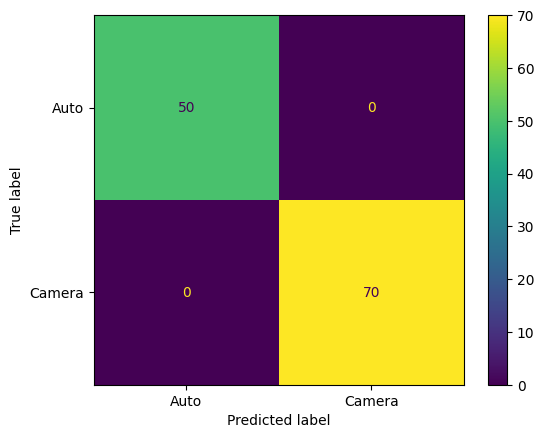


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        70

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv("Eopinions.csv")

df['Encoded Class'] = df['class'].astype('category').cat.codes

vectorizer = CountVectorizer(stop_words='english')
text_vectors = vectorizer.fit_transform(df['text'])

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in stratified_split.split(text_vectors, df['Encoded Class']):
  X_train, X_test = text_vectors[train_idx], text_vectors[test_idx]
  y_train, y_test = df['Encoded Class'].iloc[train_idx], df['Encoded Class'].iloc[test_idx]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)[:, 1] if len(model.classes_) == 2 else None
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique()).plot()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))





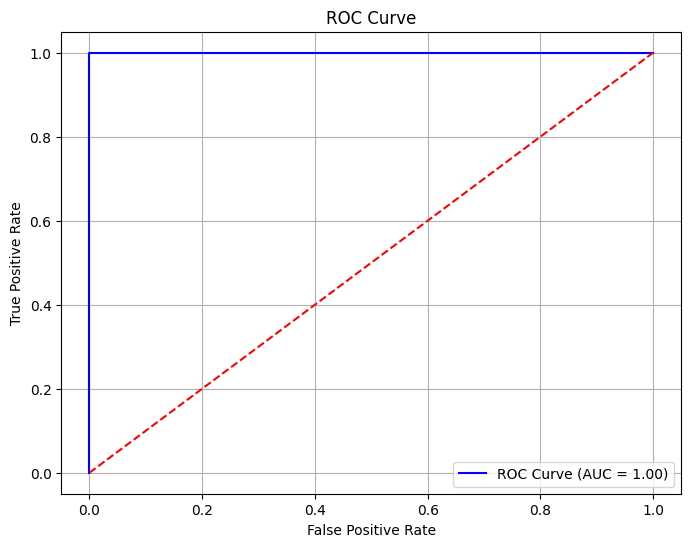

In [9]:
# ROC Curve (only if it's a binary classification problem)
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
    plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("ROC Curve is not applicable for multiclass classification.")